<a href="https://colab.research.google.com/github/SrikarK-code/bme244/blob/main/Final_HodgkinHuxleyModel_SRIKAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# C. ESTABLISHING INITIAL CONDITIONS

In [ ]:
## added paramaters to the skeleton structure
Vm = float(-60) #varying membrane potential --> for resting vm =0, hence, Vm = Vr
# this is because vm = Vm - Vr, and if vm =0, Vm = Vr
vm = float(0) # vm --> the relative membrane potential is vm = Vm - Vr, where 
# you are basically incrementing the membrane potential due to outside stimuli
# and then measuring the relative potential in regards to resting membrane 
# potential. 
e = float(2.71828) # this is just to make a float storage for the number "e"

In [ ]:
## adding parameters to the skeleton structure
# this is for probability of n,m,h gates being open 
# UNITLESS
#### for Na and K conductance
am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1) 
ah=0.07*np.exp(-vm/20)
# these two constants are the probability that all Na+ channels or at least 1 particle in the channel
# is in position to allow Na+ conductance. In Na+, there is not just one constant dictating
# the probability, unlike potassium. There is m^3h as the probability, so the probability 
# of the gate opening is based on am and ah. There is a key difference to note here, that
# am is the opening probability constant of the activation gates, while ah, is the opening
# probability constant of the inactivation gate.
bm=4*np.exp(-vm/18)
bh=1/(np.exp((30-vm)/10)+1)
# Just like am and ah, the two beta variables that correspond to Na+ conductance, are 
# responsible for being the constants for the gates, both activating and inactivating, 
# respectively, closing. 
an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
bn=0.125*np.exp(-vm/80)
# an is the constant for showing the probability that all K+ channels or at least 1 particle 
# is in position to allow K+ conductance. an governs the constant of opening gates, where,
# bn governs the constant/probability of gates closing. 

# these values are dependent upon the relative membrane potential which can change due to 
# the resting membrane potential (affected by Na+/K+ pump, leak K+ channels, leak N+ channels),
# and the absolute membrane potential which changes upon stimuli. This basically calculates
# how intense the stimuli is and how much difference there is between Vm and Vr.


In [ ]:
## writing the DiffEqs for n,m,h gates

# Figuring out initial conditions
# UNITLESS

# how do we figure out these initial conditions? -->   there is only leak channels open at rest
# so we have to think about these variables in terms of only leak --> for example dN/dt = 0
# at rest because there is no voltage opening and closing...  Now you have an algebraic equation
# to solve for M0,N0,H0 -- these expressions are derived and defined below.

# define dndti, dhdti, dmdti = 0 initially as there are only leak channels, i=initial.
# there is no opening and closing of voltage gated channels, hence the probability rate
# of a particle being able to allow K+ or N+ conductance would be 0. hence, the initial 
# d(n/h/m)dti is 0. 
dndti = 0
dhdti = 0
dmdti = 0

## create equations to solve for N[0]

# n
# dndti = an*(1-n) - bn*n #=0
# when solved for n:
n0 = an/(an+bn)

# h
# dhdti = ah*(1-h) - bh*h #=0
# when solved for n:
h0 = ah/(ah+bh)

# m
# dmdti = am*(1-m) - bm*m #=0
# when solved for m:
m0 = am/(am+bm)

## define initial conditions
M0= round(m0,3) # initial conditions for M, where M[0] = M0                        
N0= round(n0,3) # initial conditions for M, where M[0] = M0                     
H0= round(h0,3) # initial conditions for M, where M[0] = M0 


In [ ]:
# looking at initial values
print(f'M0: {M0}')
print(f'N0: {N0}')
print(f'H0: {H0}')

M0: 0.053
N0: 0.318
H0: 0.596


# PROVIDING VALUES FOR GIVEN PARAMETERS

In [ ]:
## gNa = gNaMax*(m**3)*(h)*(Vm-ENa)
## gK = gK*(n**4)*(Vm-EK)

# microSiemens/cm^2 (conductance accross cell membrane normalized by surface area)

gNa=100 #gNa is the sodium conductance in a particular cell, where it's proportional to a gMaxNa 
# gMaxNa in a neuron is 120 mS/cm^2, so gNa can vary from 0 to 120, because gMaxNa varies from 0 to 1
# --> set it to 100 (arbitrary)
gK=30 #gK is the potassium conductance in a particular cell, where it's proportional to a gMaxK 
# gMaxK in a neuron is 36 mS/cm^2, so gK can vary from 0 to 36, because gMaxK varies from 0 to 1 
# --> set it to 30 (arbitrary)

### Gating variables m**3*h, and n**4, help to describe proportion of channels open 
# for a given applied voltage over time...


In [ ]:
# these are given to us in lecture
GO= 0.3 # mS/cm^2 
# this is called leakage conductance (as name suggested from leakage currents from the original
# hodgkin huxley paper) -- basically all this G0 is saying, is that there are also other ions
# like Cl-, and some other bio-entities responsible for the conductance of the cell and 
# threshold current of the action potential; however, they are negligible in regards to 
# the Na+ and K+ conductance.
Cm= 1 # uF/cm^2
# Capacitance of the cell membrane
# The membrane capacitance is proportional to the cell surface area and, together with the membrane resistance, 
# determines the membrane time constant which dictates how fast the cell membrane potential 
# responds to the flow of ion channel currents.

In [ ]:
Vr=-60  # Vr is the resting membrane potential that's set for the cell type, -70mV in a neuron
ENa=(115+Vr)  # ENa is the nernst potential of Na --> equation is seen to the left... 
EK=(-12+Vr)  # the nernst potential of K+ measured same method as ENa... the nernst potential of Eion 
# is there is an achieved balance of electrochemical forces for the ion, where the vector for elec-
# trical force and vector for chemical force is equal and cancel each other out.     
EO=(10.613+Vr)  # EO is the nernst potential of the other ions (basically accounts for all of the other channel 
# types - according to hodgkin-huxley original paper, CL- is also an "other" ion, so we will just use
# its nernst potential as the EO                                  

In [ ]:
# Looking at Nernst Potential values
print(f'ENa: {ENa}')
print(f'EK: {EK}')
print(f'E0: {EO}')

ENa: 55
EK: -72
E0: -49.387


# VARYING THE CURRENT iSTIM VALUES TO INDUCE VARIOUS ACTION POTENTIALS

In [ ]:
Istim= 31 # usually equals Itotal --> the external stimulation 
# this is what we are calling the threshold current (UNITS) 
# this was found with guess and check methods --> can vary between cell types
Istim_hyper= 52 # defining threshold current for second AP during relative refractory period   
Istim_long = 27  # defining threshold current for longer refractory period time
Istim_substim = 25 # defining sub threshold stimulus current (arbitrary)
Istim_suprastim = 62 # defining super/supra threshold stimulus current (arbitrary)

# ESTABLISHING TIME PARAMETERS AND TIME STEPS FOR FORWARD EULER METHOD OF NUMERICAL DIFFERENTIATION

In [ ]:
t0=0 # varying start time parameter --> time at start of stimulus is 0 sec
tEnd=40 # varying end time parameter --> time at end of stimulus is 40 sec
dt=0.01  # this is step increment in time or delta t, with little change in time   

In [ ]:
t=np.arange(t0,tEnd,dt)  
# Return evenly spaced values within a given interval
# so between the start time and end time, it returns an evenly spaced interval
# with each increment being dt or 0.01, so there are about 4000 increments.
# This .arange function is built in with numpy, where np. calls the numpy package
# and .array calls the method to get from the numpy package.

In [ ]:
n=int((tEnd-t0)/dt) # does the operation to get the 4000 increments, as its 
# saying (40-0)/0.01 --> this value will be used in the below step to make 
# the n*1 array using np.zeros...                

In [ ]:
# making array with np.zeroes 
# np package
# .zeroes method
# n*1 array
V=np.zeros(n)                      
N=np.zeros(n)                       
M=np.zeros(n)                       
H=np.zeros(n)                       
GNa=np.zeros(n)                     
GK=np.zeros(n)                      
INa=np.zeros(n)                     
IK=np.zeros(n)                      
IO=np.zeros(n)                      

In [ ]:
## Defining initial conditions
# Given in code
V[0]=Vr # this is the resting membrane potential 
# where essentially, the net movement of ions due to electrochemical forces
# is balanced and can be said as 0 --> the state of the cell is at rest
# as there is no external stimuli present at this resting state.                           
M[0]=M0                            
N[0]=N0                            
H[0]=H0    

# PROVIDING ANNOTATION FOR DIFFEQ SOLVING CODE

Explain the For loop DiffEQ Code
-- This is not for any of the plotting
-- Just for informational Purposes 

In [ ]:
for i in range(0,len(t)-1):
    
    GNa[i]=gNa*H[i]*M[i]**3         
    GK[i]=gK*N[i]**4                

    # the above parameters are the conductances for Na+ and K+
    # #gNa is the sodium conductance in a particular cell, where it's proportional to a gMaxNa 
    # gMaxNa in a neuron is 120 mS/cm^2, so gNa can vary from 0 to 120, because gMaxNa varies from 0 to 1
    # gK is the potassium conductance in a particular cell, where it's proportional to a gMaxK 
    # gMaxK in a neuron is 36 mS/cm^2, so gK can vary from 0 to 36, because gMaxK varies from 0 to 1 
    # Conductance of sodium and potassium are dictated by the abundacne of leak channels and sodium potassium pumps 
    # in the cell membrane, so naturally potassium has a higher natural conductance than sodium
    # in the presence of leak channels, of course. When the action potential hits, the conductance of 
    # sodium rapidly increases while potassium G, slowly increases. But when repolarizing, the conductance
    # out of the cell for K+ is very high and Na+ into the cell is very minimal. This will be explained further
    # when we take a look at the graphs.

    INa[i]=GNa[i]*(V[i]-ENa)       
    IK[i]=GK[i]*(V[i]-EK)          
    IO[i]=GO*(V[i]-EO)   

    # the above parameters are the currents or leakage currents (I0) for Na+, K+, and other ions
    # the current of these ions are calculated by the conductance as shown above, multiplied
    # by the driving force. The driving force is nothing but the aboslute membrane potential 
    # minus the nernst potential of a certain ion. If you look a the goldman equation, these 
    # are what kind of correspond to the weights of each Eion, to generate a reasonable nernst potential.
    # The driving force here can be thought of as the membrane voltage relatively, while the Conductance
    # can be thought of as some form of a resisting parameter. So, since V=IR, I = V/R, and so we can 
    # say that higher G corresponds to lower resistance or higher flow of ions. Through this relationship
    # we can see the actual electrical current of each ion, and something interesting to note here, 
    # is that in the big picture, the leakage current (or current of the other ions/bioprocesses) is 
    # basically negligible and the current of the membrane only depends on the Na+ current and K+
    # current. We have to account for the other leakage current because it exists and isn't fully 0. 
    # It is readily seen that if the channels for an ion are closed (i.e., G = 0), the current carried 
    # by that ion will be zero (i.e., I = 0), regardless of how many channels are present in the membrane. 
    # Moreover, it can also be seen that if no electrical field acts on an ion (i.e., V = 0), the current 
    # carried by that ion will be zero (i.e., I = 0), regardless of how many channels are present in the 
    # membrane even if all those channels are open.          
    
    vm=V[i]-Vr      

    # relative membrane potential is basically the measure of the current membrane state of the cell
    # this is measured by taking the difference between the absolute membrane potential and the 
    # resting membrane potential, and can show us exactly how the stiumulus also acts on membrane potential.
    # Essentially, if we apply a large stimulus, the absolute potential will tend towards Na+ initially, 
    # and the relative potential will be some big positive number as compare to if repolarization or 
    # hyperpolarization, there will be a large negative number as relative membrane potential. 

    # these values (alphas and betas below) are dependent upon the relative membrane potential which can change due to 
    # the resting membrane potential (affected by Na+/K+ pump, leak K+ channels, leak N+ channels),
    # and the absolute membrane potential which changes upon stimuli. This basically calculates
    # how intense the stimuli is and how much difference there is between Vm and Vr.                
     
    
    am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1)
    ah=0.07*np.exp(-vm/20)
    # these two constants are the probability that all Na+ channels or at least 1 particle in the channel
    # is in position to allow Na+ conductance. In Na+, there is not just one constant dictating
    # the probability, unlike potassium. There is m^3h as the probability, so the probability 
    # of the gate opening is based on am and ah. There is a key difference to note here, that
    # am is the opening probability constant of the activation gates, while ah, is the opening
    # probability constant of the inactivation gate.
    bm=4*np.exp(-vm/18)
    bh=1/(np.exp((30-vm)/10)+1)
    # Just like am and ah, the two beta variables that correspond to Na+ conductance, are 
    # responsible for being the constants for the gates, both activating and inactivating, 
    # respectively, closing. 
    an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
    bn=0.125*np.exp(-vm/80)
    # an is the constant for showing the probability that all K+ channels or at least 1 particle 
    # is in position to allow K+ conductance. an governs the constant of opening gates, where,
    # bn governs the constant/probability of gates closing. 

    
     

    # below are the differential equations to solve for the probabilities explained above.
    # basically the rate of K+ gates opening and N+ activation/inactivation gates are 
    # governed by the dn/dt, dm/dt, and dh/dt equations, respectively. So when solved
    # for N with dt on one side, below are the equations we get. These equations use 
    # the forward euler method of differentiation to solve, which is explain in the 
    # next text block. 
    N[i+1]=N[i]+dt*(an*(1-N[i])-bn*N[i]);            
    M[i+1]=M[i]+dt*(am*(1-M[i])-bm*M[i]);            
    H[i+1]=H[i]+dt*(ah*(1-H[i])-bh*H[i]);            
    
    
    ## The below code is basically showing that when we introduce the stimulus, 
    # the Itotal or current total equals the stimulus current for the specific time
    # we want the stimulus to be applied. Hence the extra Istim parameter for the if
    # statement. When we don't apply stimulus (in resting Istim is 0) and after stimulus
    # pulse, the Istim also equals 0, so we don't see an Istim term there. The below
    # two lines will give us the membrane voltages to see if we actually achieved the 
    # action potential or not. 
    if t[i]>=7 and t[i]<=7.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim)/Cm    
    else:
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i])/Cm   

# B. FORWARD EULER METHOD

Forward Euler Method:

for any numerical method, we need to create a discretization of our variables, and one of the STANDARD ways to do this, is to define an initial time and time step, as defined by our t0 and dt, respectively. So now, tn is equal to n multipled by dt, where n is just a set of integers from 0 to final specified index value. This breaks the grid or array up into equal parts with a total of tfinal/dt steps or in our case, 40/0.01 = 4000 steps. This was done in the code with the np.arange function. To solve an ODE (first order) with the forward Euler method, we make the following approximation of the first derivative term... dy/dt = (y(n+1)-y(n))/dt, where dt in dy/dt is for integration purposes, and dt on the right side is the time step (delta or change in t). This equation is very similar to our derivative definition where we are essentially defining the slope term at any given point. We will now take this approximation and plug it into our DiffEq, that was specified which each N+ and K+ gate conductance opening and closing rate equations. dN/dt, dM/dt, and dH/dt are what we will plug this approximation in for with y being substituted with any of the aforementioned variables. Rearrange formula, as done in the for loop, to y(n+1) = y(n) + dt(current sum function with or without Istim). Can solve for each y(n+1) and then graph the membrane potentials, as current is the derivative of Voltage, essentially. So, overall, we basically did some first order taylor expansion to solve for many n+1 points. This can be graphed as the membrane voltage with mV on y-axis, and mS on x-axis.  

# D. THRESHOLD CURRENT TO INDUCE ACTION POTENTIAL IS 
# 31 mA/cm**2

One Stimulus

In [ ]:
for i in range(0,len(t)-1):
    
    GNa[i]=gNa*H[i]*M[i]**3  ## Na conductance       
    GK[i]=gK*N[i]**4  ## K conductance              

    INa[i]=GNa[i]*(V[i]-ENa) ## Current Na     
    IK[i]=GK[i]*(V[i]-EK)  ## Current K        
    IO[i]=GO*(V[i]-EO)  ## Current other ions (including Cl-)           
    
    vm=V[i]-Vr  ## relative membrane potential                    
    
    
    ## VALUES AND EQUATIONS OF THE CONSTANTS
    am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1)
    bm=4*np.exp(-vm/18)
    an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
    bn=0.125*np.exp(-vm/80)
    ah=0.07*np.exp(-vm/20)
    bh=1/(np.exp((30-vm)/10)+1)


    ### Solving for the probabilities
    N[i+1]=N[i]+dt*(an*(1-N[i])-bn*N[i]);            
    M[i+1]=M[i]+dt*(am*(1-M[i])-bm*M[i]);            
    H[i+1]=H[i]+dt*(ah*(1-H[i])-bh*H[i]);            
    
    
    ## Solving for the membrane voltages
    if t[i]>=5 and t[i]<=5.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim)/Cm     
    else:
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i])/Cm  

For the below membrane voltage graph, we see time on the x axis and mV on the y axis. Molecularly, this is known as an action potential. At resting, we see that there a no voltage gates open and only leak channels, no there isn't a membrane voltage. Then depolarization occures, where the threshold current/potential is reach, as you can see the little upward bump. When the threshold current is hit, sodium activation gates open very rapidly in the sodium voltage gated channels and then Na+ rushes into the cell, making the cell membrane potential very positive, very fast. Then there is a period known as the absolute refractory period, where at the peak of the action potential, there cannot happen an another action potential, and at this period is when inactivation gates for Na+ close and the potassium voltage gates are fully open. Note that during the opening of Na+ activation gates, the K+ were being opened too, just at a very small rate, similar to the inactivation gates of Na+ voltage gates channels. When the potassium voltage gates open, the K+ rushes out of the cell, making the cell more negative and kind of balancing out the positive charge to bring back the cell to RMP. However, the potassium gates are slow to close, so the cell goes into a state known as hyperpolarized state, where a little bit more than normal K+ rush out. During this time, the membrane potential is in a relative refractory period, as the current or potential dipped below the threshold potential. Now it's possible for an action potential to fire. To get back from hyperpolarization back to the RMP state, sodium potassium pumps can get back on duty with some ATPase and push the ions back against their concentration gradients to create a some RMP. 

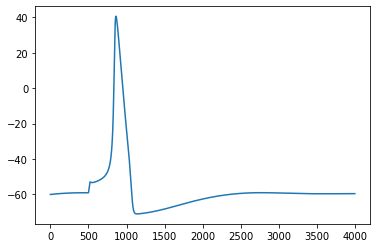

In [ ]:
## membrane voltage
voltage = plt.subplot(111)
voltage.plot(V)

This is the conductance plot for Na+ and K+ ions, and we can see this really correlates with what was said in the action potential graph. X-axis is time and y-axis is mS normalized by surface area (cm^2). So, it can be easily seen that at the time of the action potential depolarization, the sodium gates rapidly open, while the K+ gates open a lot more slowly, meaning conductance of Na+ is much higher in depolarization than K+. But during repolarization and after ARP, the potassium gate conductance is much higher, as the inactivation gate of Na+ gates have closed and its just K+ flowing out of the cell. Also, K+ conductance graph is shorter and wider compared to the Na+ conductance graph due to the snowball type effect positive feedback loop. The earlier the action potential or rise of membrane voltage, the faster it ends. 

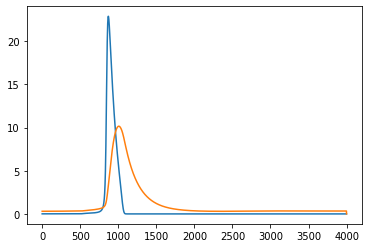

In [ ]:
## conductance
conductance = plt.subplot(111)
conductance.plot(GNa)
conductance.plot(GK)

The graph below shows the gating probability for the original stimulus threshold for one stimulus. We see that N and M have high gating probability and this makes sense, as they are representing the activation gates opening and closing. The H, however, has a low gating probability, and this checks out as H is for the inactivation gates in regards to N+ conductance. 

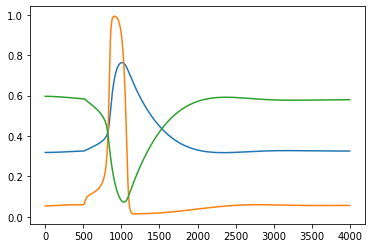

In [ ]:
prob = plt.subplot(111)
prob.plot(N)
prob.plot(M)
prob.plot(H)

# G. MAJOR PLAYERS IN ACTION POTENTIAL (OTHER CURRENT EXAMINATION)

From the below current results, we can safely say that leakage current throughout the action potential curve journey is pretty much 0 and is negligible in the big picture. The cell membrane current is mostly dictated by the Na+ current and K+ current.

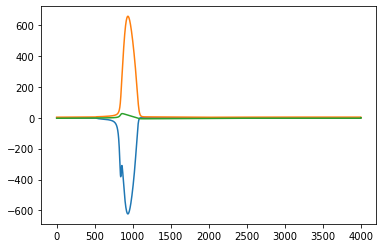

In [ ]:
current = plt.subplot(111)
current.plot(INa)
current.plot(IK)
current.plot(IO)

# E. EXAMINE EFFECT ON MEMBRANE POTENTIAL WITH SUB-THRESHOLD CURRENT VALUE

One Stimulus (Sub-Threshold)

In [ ]:
for i in range(0,len(t)-1):
    
    GNa[i]=gNa*H[i]*M[i]**3  ## Na conductance       
    GK[i]=gK*N[i]**4  ## K conductance              

    INa[i]=GNa[i]*(V[i]-ENa) ## Current Na     
    IK[i]=GK[i]*(V[i]-EK)  ## Current K        
    IO[i]=GO*(V[i]-EO)  ## Current other ions (including Cl-)           
    
    vm=V[i]-Vr  ## relative membrane potential                    
     
    
    ## VALUES AND EQUATIONS OF THE CONSTANTS
    am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1)
    bm=4*np.exp(-vm/18)
    an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
    bn=0.125*np.exp(-vm/80)
    ah=0.07*np.exp(-vm/20)
    bh=1/(np.exp((30-vm)/10)+1)


    ### Solving for the probabilities
    N[i+1]=N[i]+dt*(an*(1-N[i])-bn*N[i]);            
    M[i+1]=M[i]+dt*(am*(1-M[i])-bm*M[i]);            
    H[i+1]=H[i]+dt*(ah*(1-H[i])-bh*H[i]);            
    
    ## Solving for the membrane voltages when Istim is something less than 
    # found threshold current for one stimulus
    if t[i]>=7 and t[i]<=7.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim_substim)/Cm     
    else:
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i])/Cm 
     

The membrane voltage graph when the current stimulus is below the thershold current is shown below. Basically, there is no action potential, and no rush of Na+ to trigger an action potential, so it's just showing a minute rise and fall of Na+  conentration controlled by the opening and closing of K+ gates.

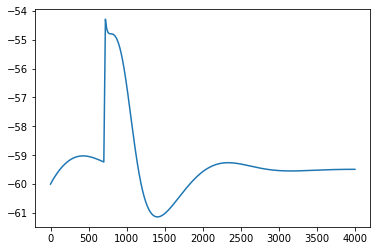

In [ ]:
## membrane voltage
voltage = plt.subplot(111)
voltage.plot(V)

# F. EXAMINE EFFECT ON MEMBRANE POTENTIAL WITH SUPRA-THRESHOLD CURRENT VALUE

One Stimulus (Supra-Threshold)

In [ ]:
for i in range(0,len(t)-1):
    
    GNa[i]=gNa*H[i]*M[i]**3  ## Na conductance       
    GK[i]=gK*N[i]**4  ## K conductance              

    INa[i]=GNa[i]*(V[i]-ENa) ## Current Na     
    IK[i]=GK[i]*(V[i]-EK)  ## Current K        
    IO[i]=GO*(V[i]-EO)  ## Current other ions (including Cl-)           
    
    vm=V[i]-Vr  ## relative membrane potential                    
     
    
    ## VALUES AND EQUATIONS OF THE CONSTANTS
    am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1)
    bm=4*np.exp(-vm/18)
    an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
    bn=0.125*np.exp(-vm/80)
    ah=0.07*np.exp(-vm/20)
    bh=1/(np.exp((30-vm)/10)+1)


    ### Solving for the probabilities
    N[i+1]=N[i]+dt*(an*(1-N[i])-bn*N[i]);            
    M[i+1]=M[i]+dt*(am*(1-M[i])-bm*M[i]);            
    H[i+1]=H[i]+dt*(ah*(1-H[i])-bh*H[i]);            
    
    
    ## Solving for the membrane voltages when stimulus current is double the 
    # threshold current found above in part D. 
    if t[i]>=7 and t[i]<=7.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim_suprastim)/Cm     
    else:
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i])/Cm 

The action potential has the same peak even though, it's double the stimulus current. It can be seen that the action potential happens and ends faster, though, because the rush of Na+ can be triggered much faster due to a higher stimulus current (current proportional to conductance). 

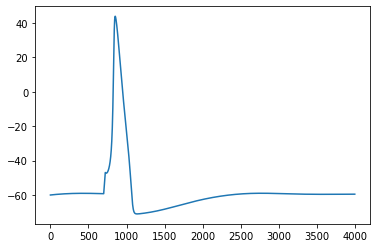

In [ ]:
## membrane voltage
voltage = plt.subplot(111)
voltage.plot(V)

# H. INVESTIGATING EFFECT OF TWO SEPARATE STIMULATING CURRENT PULSES AT DIFFERENT TIMES *(current at both is Istim)*

Two stimuli (Equal to original Istim)

In [ ]:
for i in range(0,len(t)-1):
    
    GNa[i]=gNa*H[i]*M[i]**3  ## Na conductance       
    GK[i]=gK*N[i]**4  ## K conductance              

    INa[i]=GNa[i]*(V[i]-ENa) ## Current Na     
    IK[i]=GK[i]*(V[i]-EK)  ## Current K        
    IO[i]=GO*(V[i]-EO)  ## Current other ions (including Cl-)           
    
    vm=V[i]-Vr  ## relative membrane potential                    
     
    
    ## VALUES AND EQUATIONS OF THE CONSTANTS
    am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1)
    bm=4*np.exp(-vm/18)
    an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
    bn=0.125*np.exp(-vm/80)
    ah=0.07*np.exp(-vm/20)
    bh=1/(np.exp((30-vm)/10)+1)


    ### Solving for the probabilities
    N[i+1]=N[i]+dt*(an*(1-N[i])-bn*N[i]);            
    M[i+1]=M[i]+dt*(am*(1-M[i])-bm*M[i]);            
    H[i+1]=H[i]+dt*(ah*(1-H[i])-bh*H[i]);            
    
    
    ## Solving for the membrane voltages when two current stimuli are applied
    # at two different times, however at the same interval -- the same current
    # value in amperes is applied
    if t[i]>=5 and t[i]<=5.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim)/Cm
    elif t[i]>=20 and t[i]<=20.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim)/Cm     
    else:
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i])/Cm        

Let's look at the membrane voltage graph when there are two stimuli of the same current. We can see that the first action potential occurs to the stimulus current, but the second action potential does not occur, during the "relative refractory period" and hyperpolarized state, because the current stimulus was not enough.Basically, there are still K+ leaving the cell at this time, so the stimulus current needs to counteract that and increase for the second action potential to be fired.

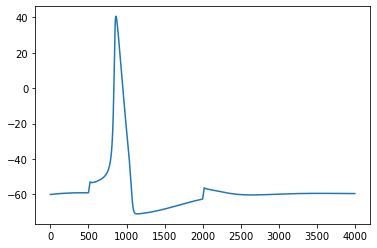

In [ ]:
## membrane voltage
voltage = plt.subplot(111)
voltage.plot(V)

We can see the same with conductance, as the conductance is just looking like the original one stimulus conductance, there is not two jumps for Na+ conductance or K+ conductance, so the gates did not all open twice, they just had that effect once. 

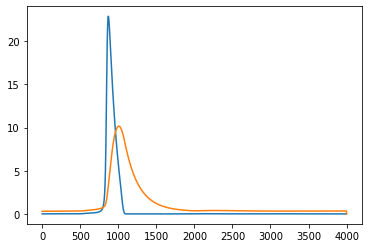

In [ ]:
## conductance
conductance = plt.subplot(111)
conductance.plot(GNa)
conductance.plot(GK)

# H. INVESTIGATING EFFECT OF TWO SEPARATE STIMULATING CURRENT PULSES AT DIFFERENT TIMES *(current at second ilicits action potential Istim_hyper)*

Two stimuli (1 Istim and 1 stimulus to ilicit action potential from refractory period)



In [ ]:
for i in range(0,len(t)-1):
    
    GNa[i]=gNa*H[i]*M[i]**3  ## Na conductance       
    GK[i]=gK*N[i]**4  ## K conductance              

    INa[i]=GNa[i]*(V[i]-ENa) ## Current Na     
    IK[i]=GK[i]*(V[i]-EK)  ## Current K        
    IO[i]=GO*(V[i]-EO)  ## Current other ions (including Cl-)           
    
    vm=V[i]-Vr  ## relative membrane potential                    
     
    
    ## VALUES AND EQUATIONS OF THE CONSTANTS
    am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1)
    bm=4*np.exp(-vm/18)
    an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
    bn=0.125*np.exp(-vm/80)
    ah=0.07*np.exp(-vm/20)
    bh=1/(np.exp((30-vm)/10)+1)


    ### Solving for the probabilities
    N[i+1]=N[i]+dt*(an*(1-N[i])-bn*N[i]);            
    M[i+1]=M[i]+dt*(am*(1-M[i])-bm*M[i]);            
    H[i+1]=H[i]+dt*(ah*(1-H[i])-bh*H[i]);            
    
    
    ## Solving for the membrane voltages when two different stimuli, with two 
    # different threshold currents is applied. Basically, in the relative refractory 
    # period, if we want to generate an action potential, we need a lot more stimulus 
    # current as we need to counteract the open K+ channels allowing K+ to leave the cell
    # making the cell less positive. Hence, Istim_hyper is the value that gives us 
    # the action potential from the relative refractory period.
    if t[i]>=5 and t[i]<=5.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim)/Cm
    elif t[i]>=20 and t[i]<=20.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim_hyper)/Cm     
    else:
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i])/Cm        

Increasing the stimulus current allows for the action potential to fire, as the below graph suggests. There are now two action potentials being fired and they are of the same magnitude.

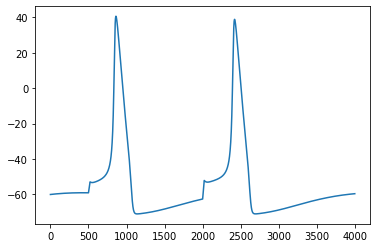

In [ ]:
## membrane voltage
voltage = plt.subplot(111)
voltage.plot(V)

Conductance shows us the same as membrane potential, as when time progressed, there is another burst of Na+ conductance (showing activation gates opening rapidly) and a K+ slowly opening for depolarization. We can see that the action potential conductance curves still hold true for both the first and second action potential. 

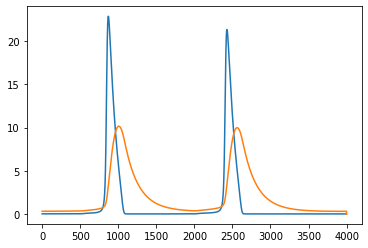

In [ ]:
## conductance
conductance = plt.subplot(111)
conductance.plot(GNa)
conductance.plot(GK)

# I. INVESTIGATING EFFECT OF TWO SEPARATE STIMULATING CURRENT PULSES AT DIFFERENT TIMES *(current at second ilicits action potential Istim_long as time is also double for second stimulus)*

Two stimuli (1 Istim and 1 stimulus to ilicit action potential from refractory period) -- This time refractory period stimuli lasts two times as long...

In [ ]:
for i in range(0,len(t)-1):
    
    GNa[i]=gNa*H[i]*M[i]**3  ## Na conductance       
    GK[i]=gK*N[i]**4  ## K conductance              

    INa[i]=GNa[i]*(V[i]-ENa) ## Current Na     
    IK[i]=GK[i]*(V[i]-EK)  ## Current K        
    IO[i]=GO*(V[i]-EO)  ## Current other ions (including Cl-)           
    
    vm=V[i]-Vr  ## relative membrane potential                    
     
    
    ## VALUES AND EQUATIONS OF THE CONSTANTS
    am=(0.1*(25-vm))/(np.exp((25-vm)/10)-1)
    bm=4*np.exp(-vm/18)
    an=(0.01*(10-vm))/(np.exp((10-vm)/10)-1)
    bn=0.125*np.exp(-vm/80)
    ah=0.07*np.exp(-vm/20)
    bh=1/(np.exp((30-vm)/10)+1)


    ### Solving for the probabilities
    N[i+1]=N[i]+dt*(an*(1-N[i])-bn*N[i]);            
    M[i+1]=M[i]+dt*(am*(1-M[i])-bm*M[i]);            
    H[i+1]=H[i]+dt*(ah*(1-H[i])-bh*H[i]);            
    
    
    ## Solving for the membrane voltages when two different current stimuli are
    # applied to the same system at two different times. however, this time, we 
    # increased the time of stimulus (there will be like compound build up now --
    # something like a temporal addition) so the stimulus to ilicit an action 
    # potential from the relative refractory period is lower.
    if t[i]>=5 and t[i]<=5.2:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim)/Cm
    elif t[i]>=20 and t[i]<=20.4:                              
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i]+Istim_long)/Cm     
    else:
        V[i+1]=V[i]+dt*(-INa[i]-IK[i]-IO[i])/Cm        

The longer second stimulus duration allows for a much smaller threshold current to induce an action potential. This is due to a type of compound effect known as temporal compounding, where the presynaptic neuron is repeatedly sending neurotransmitters into the synaptic space. Think like a woodpecker constantly pecking at the tree. These effects compound quickly to generate the action potential with a much lower stimulus current, as the action is repeated over and over again, twice as long as the original stimulus time. See below that both action potentials are generated. 

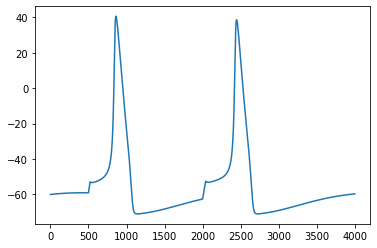

In [ ]:
## membrane voltage
voltage = plt.subplot(111)
voltage.plot(V)